# EDA Caso Integrador Airbnb

## Importar las librerias



In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from datetime import datetime
import seaborn as sns

## Creación de las rutas de los archivos

In [2]:
ruta_calendar = 'calendar.csv'
ruta_listings = 'listings.csv'
ruta_reviews = 'reviews.csv'

## Crear los Dataframes con pandas

In [3]:
calendar = pd.read_csv(ruta_calendar)
listings = pd.read_csv(ruta_listings)
reviews = pd.read_csv(ruta_reviews)

C:\Users\sebas\AppData\Local\Temp\ipykernel_5028\1508389462.py:2: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv(ruta_listings)


## Transformaciones en calendar

### Verificar el tipo de datos y la estructura del dataframe

In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661286 entries, 0 to 8661285
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 462.6+ MB


In [5]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50778,2020-04-26,f,"$2,655.00","$2,655.00",5.0,1125.0
1,133654,2020-04-27,t,"$1,150.00","$1,150.00",4.0,1125.0
2,133654,2020-04-28,t,"$1,150.00","$1,150.00",4.0,1125.0
3,133654,2020-04-29,t,"$1,150.00","$1,150.00",4.0,1125.0
4,133654,2020-04-30,t,"$1,150.00","$1,150.00",4.0,1125.0


### Cambio de formatos en el dataframe

In [6]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

### Eliminar las columnas no necesarias

In [7]:
calendar = calendar.drop('price', axis=1)

In [8]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661286 entries, 0 to 8661285
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   adjusted_price  float64       
 4   minimum_nights  float64       
 5   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 396.5+ MB


### Guardar el nuevo CSV con los datos modificados

In [9]:
calendar.to_csv('calendar_arreglado.csv', index=False)

## Transformaciones en reviews

### Verificar el tipo de datos y estructura del dataframe

In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387099 entries, 0 to 387098
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     387099 non-null  int64 
 1   id             387099 non-null  int64 
 2   date           387099 non-null  object
 3   reviewer_id    387099 non-null  int64 
 4   reviewer_name  387099 non-null  object
 5   comments       386923 non-null  object
dtypes: int64(3), object(3)
memory usage: 17.7+ MB


In [11]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...
3,11508,6050019,2013-07-28,4600436,Tara,"The apartment was in a beautiful, modern build..."
4,11508,9328455,2013-12-22,3130017,Simon,My stay at Candela's apartment was very enjoya...


### Cambio de formato en las variables

In [12]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387099 entries, 0 to 387098
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     387099 non-null  int64         
 1   id             387099 non-null  int64         
 2   date           387099 non-null  datetime64[ns]
 3   reviewer_id    387099 non-null  int64         
 4   reviewer_name  387099 non-null  object        
 5   comments       386923 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 17.7+ MB


In [30]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentimiento,compuesto
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...,"{'neg': 0.017, 'neu': 0.754, 'pos': 0.228, 'co...",0.9712
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...,"{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...",0.9017
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...,"{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...",0.9476
3,11508,6050019,2013-07-28,4600436,Tara,"The apartment was in a beautiful, modern build...","{'neg': 0.038, 'neu': 0.797, 'pos': 0.165, 'co...",0.9629
4,11508,9328455,2013-12-22,3130017,Simon,My stay at Candela's apartment was very enjoya...,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",0.9632


### Analisis de sentimiento de los comentarios de los reviews

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sebas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
sia = SentimentIntensityAnalyzer()

In [16]:
reviews['sentimiento'] = reviews['comments'].apply(lambda x: sia.polarity_scores(str(x)))

In [17]:
reviews['compuesto'] = reviews['sentimiento'].apply(lambda x: x['compound'])

In [18]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,sentimiento,compuesto
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...,"{'neg': 0.017, 'neu': 0.754, 'pos': 0.228, 'co...",0.9712
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...,"{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...",0.9017
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...,"{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...",0.9476
3,11508,6050019,2013-07-28,4600436,Tara,"The apartment was in a beautiful, modern build...","{'neg': 0.038, 'neu': 0.797, 'pos': 0.165, 'co...",0.9629
4,11508,9328455,2013-12-22,3130017,Simon,My stay at Candela's apartment was very enjoya...,"{'neg': 0.0, 'neu': 0.754, 'pos': 0.246, 'comp...",0.9632


### Guardar el nuevo CSV con los datos modificados

In [19]:
reviews.to_csv('reviews_arreglado.csv', index=False)

## Transformaciones en Listing

### Verificar tipo de datos y variables

In [20]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [21]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,...,f,f,moderate,f,f,1,0,1,0,0.16
2,13095,https://www.airbnb.com/rooms/13095,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Standard room : Palermo Viejo Bed & Breakfast ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,0.06
3,13096,https://www.airbnb.com/rooms/13096,20200426042522,2020-04-26,Standard Room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,NaN
4,13097,https://www.airbnb.com/rooms/13097,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,1.89


### Elimianr las columnas que no se consideran necesarias para el caso de estudio

In [22]:
listings = listings.drop(['listing_url'], axis=1)
listings = listings.drop(['scrape_id'], axis=1)
listings = listings.drop(['last_scraped'], axis=1)
listings = listings.drop(['space'], axis=1)
listings = listings.drop(['description'], axis=1)
listings = listings.drop(['notes'], axis=1)
listings = listings.drop(['house_rules'], axis=1)
listings = listings.drop(['thumbnail_url'], axis=1)
listings = listings.drop(['medium_url'], axis=1)
listings = listings.drop(['picture_url'], axis=1)
listings = listings.drop(['xl_picture_url'], axis=1)
listings = listings.drop(['host_url'], axis=1)
listings = listings.drop(['host_about'], axis=1)
listings = listings.drop(['host_thumbnail_url'], axis=1)
listings = listings.drop(['host_picture_url'], axis=1)
listings = listings.drop(['host_neighbourhood'], axis=1)
listings = listings.drop(['host_verifications'], axis=1)
listings = listings.drop(['host_has_profile_pic'], axis=1)
listings = listings.drop(['street'], axis=1)
listings = listings.drop(['neighbourhood_cleansed'], axis=1)
listings = listings.drop(['neighbourhood_group_cleansed'], axis=1)
listings = listings.drop(['zipcode'], axis=1)
listings = listings.drop(['is_location_exact'], axis=1)
listings = listings.drop(['minimum_maximum_nights'], axis=1)
listings = listings.drop(['maximum_maximum_nights'], axis=1)
listings = listings.drop(['minimum_nights_avg_ntm'], axis=1)
listings = listings.drop(['maximum_nights_avg_ntm'], axis=1)
listings = listings.drop(['calendar_updated'], axis=1)
listings = listings.drop(['calendar_last_scraped'], axis=1)
listings = listings.drop(['number_of_reviews_ltm'], axis=1)
listings = listings.drop(['first_review'], axis=1)
listings = listings.drop(['last_review'], axis=1)
listings = listings.drop(['requires_license'], axis=1)
listings = listings.drop(['license'], axis=1)
listings = listings.drop(['jurisdiction_names'], axis=1)
listings = listings.drop(['require_guest_profile_picture'], axis=1)
listings = listings.drop(['require_guest_phone_verification'], axis=1)
listings = listings.drop(['summary'], axis=1)
listings = listings.drop(['neighborhood_overview'], axis=1)
listings = listings.drop(['transit'], axis=1)
listings = listings.drop(['access'], axis=1)
listings = listings.drop(['interaction'], axis=1)

In [23]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23729 entries, 0 to 23728
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23729 non-null  int64  
 1   name                                          23719 non-null  object 
 2   experiences_offered                           23729 non-null  object 
 3   host_id                                       23729 non-null  int64  
 4   host_name                                     23726 non-null  object 
 5   host_since                                    23726 non-null  object 
 6   host_location                                 23626 non-null  object 
 7   host_response_time                            16843 non-null  object 
 8   host_response_rate                            16843 non-null  object 
 9   host_acceptance_rate                          18530 non-null 

### Cambio de formato en las columnas

In [24]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
listings['weekly_price'] = listings['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
listings['monthly_price'] = listings['monthly_price'].replace('[\$,]', '', regex=True).astype(float)

In [25]:
listings


,id,name,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,Amazing Luxurious Apt-Palermo Soho,none,42762,Candela,2009-10-01,"New York, New York, United States",within a few hours,100%,100%,...,10.0,10.0,f,f,strict_14_with_grace_period,1,1,0,0,0.27
1,12463,Room in Recoleta - awesome location,none,48799,Matt,2009-10-28,"Danbury, Connecticut, United States",within a few hours,100%,NaN,...,10.0,10.0,f,f,moderate,1,0,1,0,0.16
2,13095,Standard Room at Palermo Viejo B&B,none,50994,Ariel,2009-11-03,"Buenos Aires, Capital Federal, Argentina",within an hour,100%,100%,...,10.0,10.0,f,f,strict_14_with_grace_period,7,0,7,0,0.06
3,13096,Standard Room in Palermo Viejo B&B,none,50994,Ariel,2009-11-03,"Buenos Aires, Capital Federal, Argentina",within an hour,100%,100%,...,NaN,NaN,f,f,strict_14_with_grace_period,7,0,7,0,NaN
4,13097,Standard Room at Palermo Viejo B&B,none,50994,Ariel,2009-11-03,"Buenos Aires, Capital Federal, Argentina",within an hour,100%,100%,...,10.0,10.0,f,f,strict_14_with_grace_period,7,0,7,0,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23724,43278316,Huge House 6br patio and terrace,none,1875949,Diego,2012-03-07,"Buenos Aires, Buenos Aires, Argentina",within an hour,98%,96%,...,NaN,NaN,f,f,flexible,62,61,0,0,NaN
23725,43280399,Patricios Park semi amueblado,none,316810023,Luis,2019-12-12,AR,within a few hours,100%,60%,...,NaN,NaN,f,f,flexible,2,2,0,0,NaN
23726,43280552,Depto cañitas inigualable 4 pax,none,344453532,Agustin,2020-04-22,AR,NaN,NaN,100%,...,NaN,NaN,t,f,flexible,1,1,0,0,NaN
23727,43281112,Excelente departamento Palermo new age,none,344590039,Nicolas,2020-04-25,AR,NaN,NaN,NaN,...,NaN,NaN,t,f,flexible,1,1,0,0,NaN


### Eliminar los valores vacios del dataframe

In [26]:
listings.fillna('N/D', inplace=True)

C:\Users\sebas\AppData\Local\Temp\ipykernel_5028\3359465603.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/D' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  listings.fillna('N/D', inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_5028\3359465603.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/D' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  listings.fillna('N/D', inplace=True)


### Guardar el nuevo CSV con los datos modificados

In [27]:
listings.to_csv('listings_arreglado.csv', index=False)

## Combinamos dos conjuntos de datos, calendar y listings, en un solo conjunto de datos llamado merged_df. La combinación se realiza en base a una columna común: listing_id en calendar y id en listings.

In [34]:
merged_df = pd.merge(calendar, listings[['id', 'review_scores_value']], left_on='listing_id', right_on='id', how='inner')

## Eliminamos las filas en merged_df que tienen datos faltantes.

In [35]:
merged_df.dropna(inplace=True)

## Verificamos el tipo de dato

In [37]:
merged_df

,listing_id,date,available,adjusted_price,minimum_nights,maximum_nights,id,review_scores_value
0,50778,2020-04-26,f,2655.0,5.0,1125.0,50778,9.0
1,133654,2020-04-27,t,1150.0,4.0,1125.0,133654,9.0
2,133654,2020-04-28,t,1150.0,4.0,1125.0,133654,9.0
3,133654,2020-04-29,t,1150.0,4.0,1125.0,133654,9.0
4,133654,2020-04-30,t,1150.0,4.0,1125.0,133654,9.0
...,...,...,...,...,...,...,...,...
8661281,43178560,2021-04-21,f,3319.0,1.0,1125.0,43178560,N/D
8661282,43178560,2021-04-22,f,3319.0,1.0,1125.0,43178560,N/D
8661283,43178560,2021-04-23,f,3319.0,1.0,1125.0,43178560,N/D
8661284,43178560,2021-04-24,f,3319.0,1.0,1125.0,43178560,N/D


## Cambiamos la columna "available" a datos tipo bool

In [38]:
merged_df['available'] = merged_df['available'].map({'f': False, 't': True})

## Cambiamos los datos de N/D en la columna review_scores_value por valores vacios para poder hacer la matriz de correlación

In [40]:
merged_df['review_scores_value'] = merged_df['review_scores_value'].replace('N/D', pd.NA)

## Cambiamos los valores vacios con el metodo de medias moviles

In [43]:
median_value = merged_df['review_scores_value'].median()
merged_df['review_scores_value'].fillna(median_value, inplace=True)

C:\Users\sebas\AppData\Local\Temp\ipykernel_5028\1492769354.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['review_scores_value'].fillna(median_value, inplace=True)
C:\Users\sebas\AppData\Local\Temp\ipykernel_5028\1492769354.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df['review_sc

## Calculamos una matriz de correlación, corr_matrix, que muestra cómo se relacionan entre sí las diferentes columnas en merged_df.

In [44]:
corr_matrix = merged_df.corr(method='pearson', min_periods=2)

## Creamos un mapa de calor (heatmap) de corr_matrix para visualizar estas relaciones. Los colores en el mapa de calor representan el grado de correlación entre las variables: los colores cálidos (como el rojo) indican una correlación positiva fuerte, mientras que los colores fríos (como el azul) indican una correlación negativa fuerte.

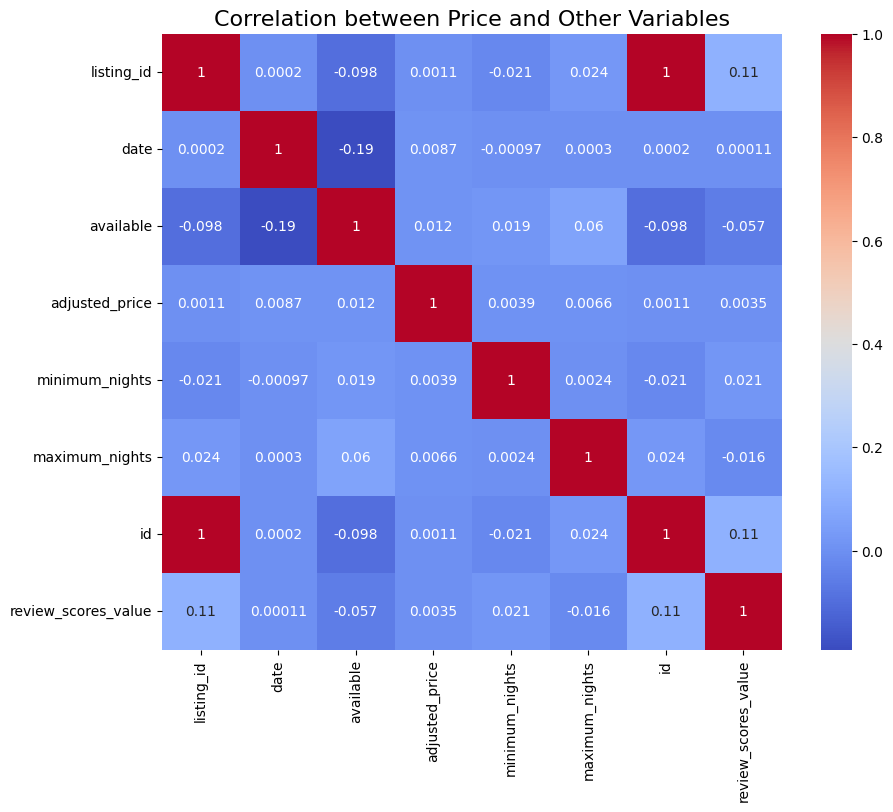

In [45]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Price and Other Variables", fontsize=16)
plt.show()

## Calculamos el heat map para el dataframe de listings unicamente

In [47]:
listings

,id,name,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,Amazing Luxurious Apt-Palermo Soho,none,42762,Candela,2009-10-01 00:00:00,"New York, New York, United States",within a few hours,100%,100%,...,10.0,10.0,f,f,strict_14_with_grace_period,1,1,0,0,0.27
1,12463,Room in Recoleta - awesome location,none,48799,Matt,2009-10-28 00:00:00,"Danbury, Connecticut, United States",within a few hours,100%,N/D,...,10.0,10.0,f,f,moderate,1,0,1,0,0.16
2,13095,Standard Room at Palermo Viejo B&B,none,50994,Ariel,2009-11-03 00:00:00,"Buenos Aires, Capital Federal, Argentina",within an hour,100%,100%,...,10.0,10.0,f,f,strict_14_with_grace_period,7,0,7,0,0.06
3,13096,Standard Room in Palermo Viejo B&B,none,50994,Ariel,2009-11-03 00:00:00,"Buenos Aires, Capital Federal, Argentina",within an hour,100%,100%,...,N/D,N/D,f,f,strict_14_with_grace_period,7,0,7,0,N/D
4,13097,Standard Room at Palermo Viejo B&B,none,50994,Ariel,2009-11-03 00:00:00,"Buenos Aires, Capital Federal, Argentina",within an hour,100%,100%,...,10.0,10.0,f,f,strict_14_with_grace_period,7,0,7,0,1.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23724,43278316,Huge House 6br patio and terrace,none,1875949,Diego,2012-03-07 00:00:00,"Buenos Aires, Buenos Aires, Argentina",within an hour,98%,96%,...,N/D,N/D,f,f,flexible,62,61,0,0,N/D
23725,43280399,Patricios Park semi amueblado,none,316810023,Luis,2019-12-12 00:00:00,AR,within a few hours,100%,60%,...,N/D,N/D,f,f,flexible,2,2,0,0,N/D
23726,43280552,Depto cañitas inigualable 4 pax,none,344453532,Agustin,2020-04-22 00:00:00,AR,N/D,N/D,100%,...,N/D,N/D,t,f,flexible,1,1,0,0,N/D
23727,43281112,Excelente departamento Palermo new age,none,344590039,Nicolas,2020-04-25 00:00:00,AR,N/D,N/D,N/D,...,N/D,N/D,t,f,flexible,1,1,0,0,N/D
